In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import pickle

![esquema](esquema.png)

In [16]:
# Network Architecture
ILS = 1 #Input layer size
NL, LS = 5, 10 # Number of hidden layers and their size

# Initialize weights
def init_w(ils=ILS, nl=NL, ls=LS):
    nu = [ils] + [ls] * nl
    w = []
    for l in range(nl):
        w.append([])
        for i in range(nu[l]):
            w[l].append([])
            for j in range(nu[l+1]):
                w[l][i].append(2*(np.random.uniform()-.5)**1)
    w.append([[(2*(np.random.uniform()-.5))**1 for i in range(nu[nl])]])

        
    return w

# Import weights
def import_w(file):
    with open(file, 'rb') as f:
        w = pickle.load(f)
    return w
    
# Compute output
def compute_output(invals, w, activation_fun):
    # Input layer
    cl = np.array(invals)
    # Hidden layers
    for l in range(len(w)-1):
        #print(len(w[l][0]))
        cl = np.array([np.sum([w[l][i][j]*cl[i] for i in range(len(cl))]) for j in range(len(w[l][0]))])
        if activation_fun=='tanh':
            cl = np.tanh(cl)
        elif activation_fun=='ReLU':
            cl=[cl_i if cl_i>0 else 0 for cl_i in cl]
        elif activation_fun=='leaky_ReLU':
            cl=[cl_i if cl_i>0 else 0.01*cl_i for cl_i in cl]
            
        
    return(np.sum([w[-1][i][0] * cl[i] for i in range(len(w[-1]))]))

In [20]:
NREP = 10
d_all = pd.DataFrame({'x1' : [], 'y': [], 'rep': []})
d_all_raw = pd.DataFrame({'x1' : [], 'y_raw': [], 'rep': []})

activation_function='leaky_ReLU'

Load_pickle=True
#load pickle
if Load_pickle==True:
    filename = 'NN_weights_' + activation_function + '_NREP_10_.pickle'
    weights = import_w('../Data/' + filename)
    
elif Load_pickle==False:
    #Initialize and save
    weights=[]
    
for rep in range(NREP):
    
    if Load_pickle==True:
        #load pickle
        w=weights[rep]
        print(len(w))
        for element in w:
            print(len(element))
            for small_weights in element:
                print(small_weights)
                print("\n")
    elif Load_pickle==False:
        #initialize and save
        w = init_w(ils=ILS+1, nl=NL, ls=LS)
        weights.append(w)

    
    x1 = np.arange(-4, 4, 0.05)
    
    x1s, ys = [], []
    
    y = [compute_output([1, thisx1], w, activation_function) for thisx1 in x1]

    x1s=x1
    ys=y
    
    # Normalize y to [0, 1]
    ys = np.array(ys)
    
    ys_norm = (ys - min(ys)) / (max(ys) - min(ys) + 1e-15)

    d = pd.DataFrame({'x1' : x1s, 'y' : ys_norm, 'rep': rep})
    d_all=pd.concat([d_all,d])
    
    #Save non-normalized version
    d_raw = pd.DataFrame({'x1' : x1s, 'y_raw' : ys, 'rep': rep})
    d_all_raw=pd.concat([d_all_raw,d_raw])
    
save=False
if save==True:
    with open('../Data/' + 'NN_weights_' + activation_function + '_NREP_' + str(NREP) + '_' + '.pickle', 'wb') as f:
        pickle.dump(weights, f, protocol=None)

    d_all.to_csv('../Data/' + 'NN_function_' + activation_function + '_NREP_' + str(NREP) + '_data.csv')
    d_all_raw.to_csv('../Data/' + 'Non_normalized_NN_function_' + activation_function + '_NREP_' + str(NREP) + '_data.csv')
#print(d_all)

6
2
[0.95067350046075, -0.19794936824506326, 0.7740756266271269, -0.24642977462498816, 0.922398715382627, 0.922511785803418, 0.8273376496347478, 0.7537726013053616, -0.4438423896787851, -0.5491263997824729]


[0.6656779767067722, 0.5782495665653709, 0.37603569720364893, -0.7802152969377836, 0.8006385197974595, 0.8404708607361622, -0.005892321308732962, -0.5915851980559386, 0.7696404095706493, 0.3452853445059283]


10
[0.21696971624512185, 0.9530599355761213, -0.07380310338104223, 0.11382172992004924, -0.5551739337585566, 0.7837644267900525, -0.2442970255671708, -0.13472981028991193, 0.7954322868271901, 0.849358294423225]


[0.06707901152895435, 0.13558801058424397, -0.47898308193927774, -0.08369564805496577, 0.3598140852970113, -0.5175773761056668, -0.9588748894896497, -0.3278574472228315, -0.0017026788085705569, 0.010539645399556319]


[0.9893152585105494, 0.6859559349669728, -0.1023382518229905, -0.9425984427737357, -0.9361178179175986, -0.9487331403598813, -0.17999203753919124, -0.1

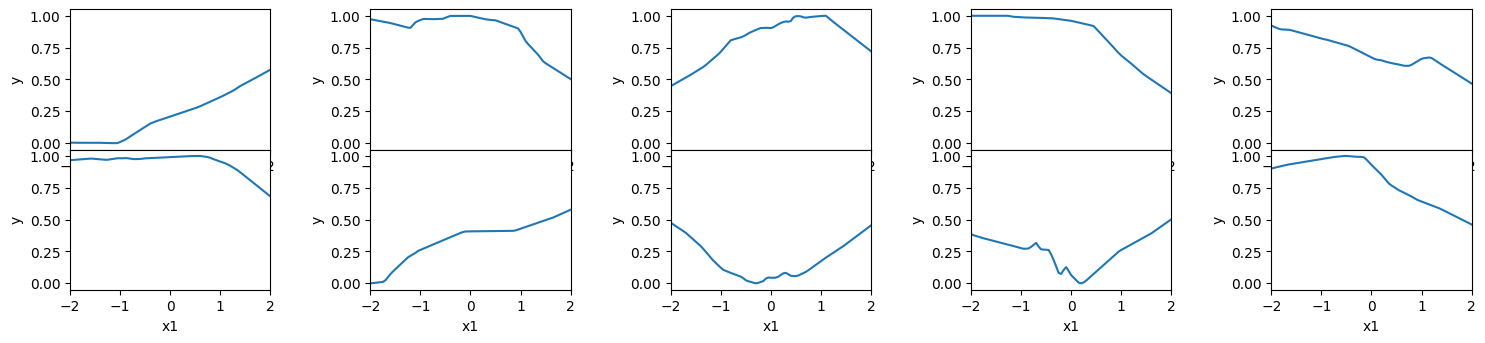

In [73]:
#PLOT -2,2

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches                                                                                                                                                                        
width=40*cm;height=8*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]

rows=2;cols=5
gs=gridspec.GridSpec(rows,cols)
gs.update(left=0.1,right=0.99,bottom=0.08,top=0.97,wspace=0.5,hspace=0.0)

#Plot train rank (-2,2)
h=0
for r in range(rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        d=d_all[d_all['rep']==h]
        ax_rc=sns.lineplot(data=d, x='x1', y='y')
        ax_rc.set_xlim(-2,2)
        h+=1
plt.savefig('../results/Figures/' + 'NN_function_' + activation_function + '_' + 'ILS%d_NL%d_LS%d'  %(ILS, NL,  LS) + '.png', dpi=300)

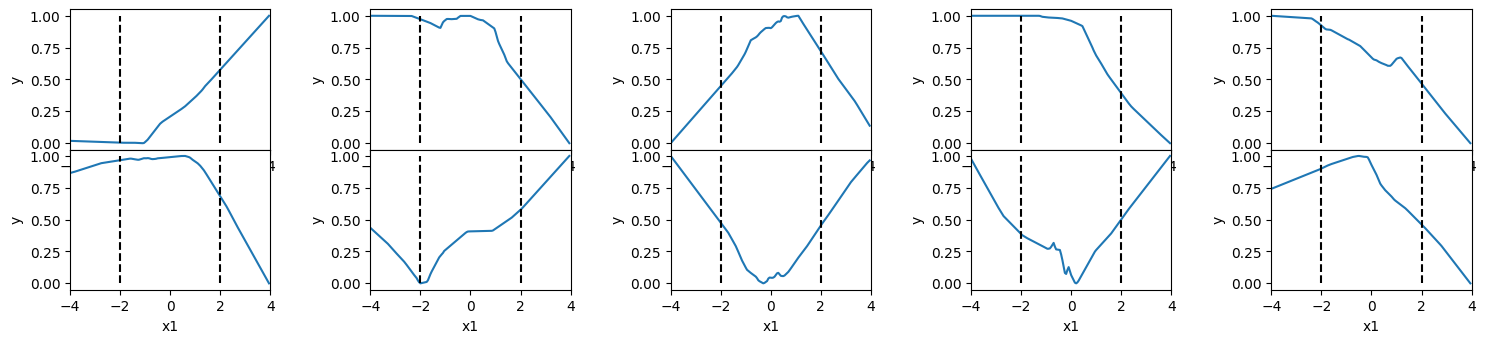

In [68]:
#PLOT FULL RANK (-4,4)

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches                                                                                                                                                                        
width=40*cm;height=8*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]


h=0
for r in range(rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        d=d_all[d_all['rep']==h]
        ax_rc=sns.lineplot(data=d, x='x1', y='y')
        ax_rc.vlines(x=[-2, 2], ymin=0, ymax=1, color='k',linestyle='--')
        ax_rc.set_xlim(-4,4)
        h+=1
plt.savefig('../results/Figures/' + 'NN_function_' + activation_function + '_' + 'ILS%d_NL%d_LS%d_full_rank'  %(ILS, NL,  LS) + '.png', dpi=300)      
#plt.show()

## ILS inputs, random positions

In [3]:
# Input layer size
ILS = 4
# Number of hidden layers and their size
NL, LS = 5, 10

NP = 6400
NREP = 10
for rep in range(NREP):
    w = init_w(ils=ILS+1, nl=NL, ls=LS)
    x = {}
    for k in range(ILS):
        x[k] = [10 * (np.random.uniform() - .5) for i in range(NP)]
    ys = [compute_output([1] +[x[i][n] for i in range(ILS)], w) for n in range(NP)]

    # Normalize y to [0, 1]
    ys = np.array(ys)
    ys = (ys - min(ys)) / (max(ys) - min(ys))
        
    d = pd.DataFrame({'x1' : x[0], 'x2' : x[1], 'x3' : x[2], 'x4' : x[3], 'y' : ys})
    d.to_csv('sample_ILS%d_NL%d_LS%d.%d.csv' % (ILS, NL, LS, rep), index=False)